In [1]:
import tensorflow as tf
import pandas as pd 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import os

df_external = pd.read_csv(os.path.join(os.getcwd(),'External Validation Datasets/randomNegatives No Overlap External Validation Set.csv'))

In [2]:
###2.# Define the directory where your models are saved

parent_dir = os.path.dirname(os.getcwd())


model_directory = os.path.join(parent_dir, 'Step 3 External Validation/Classification Models/Complete Set 1 No Overlap Models')

models = []
#,8,9,10,11,12,13,14,15,16,17,18,41
# Assuming your models are named 'model_0.h5', 'model_1.h5', ..., 'model_19.h5'
model_paths = [os.path.join(model_directory, f'ROBOMechDB Complete Set 1 No Overlap Model Seed {i+1}.keras') for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,41]]


for path in model_paths:
    print(f'Loading model from {path}')
    model = tf.keras.models.load_model(path)
    models.append(model)
    print(f'Model from {path} loaded successfully')

Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-21-24/Step 3 External Validation/Classification Models/Complete Set 1 No Overlap Models/ROBOMechDB Complete Set 1 No Overlap Model Seed 1.keras
Model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-21-24/Step 3 External Validation/Classification Models/Complete Set 1 No Overlap Models/ROBOMechDB Complete Set 1 No Overlap Model Seed 1.keras loaded successfully
Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-21-24/Step 3 External Validation/Classification Models/Complete Set 1 No Overlap Models/ROBOMechDB Complete Set 1 No Overlap Model Seed 2.keras
Model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-21-24/Step 3 External Validation/Classification Models/Complete Set 1 No Overlap Models/ROBOMechDB Complete Set 1 No Overlap Model Seed 2.keras loaded successfully
Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-21-24/Step 3 External Validation/Classification Mo

In [3]:
prediction_matrix = []
for j in range(len(models)):
    prediction_value = models[j].predict(df_external.iloc[:,3:-1])
    prediction_value = prediction_value.flatten()
    prediction_matrix.append(prediction_value)

prediction_matrix = np.array(prediction_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2ea4d7ec0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━

In [4]:
stability_matrix = prediction_matrix.T

pos_avg_predictions = []
pos_predictions_stdevs= []
neg_avg_predictions = []
neg_predictions_stdevs= []
for i in range(len(stability_matrix)):
    mean_pred_value = np.mean(stability_matrix[i])
    std_dev_pred_value = np.std(stability_matrix[i])
    if mean_pred_value <0.5:
        neg_avg_predictions.append(mean_pred_value)
        neg_predictions_stdevs.append(std_dev_pred_value)
    elif mean_pred_value >=0.5:
        pos_avg_predictions.append(mean_pred_value)
        pos_predictions_stdevs.append(std_dev_pred_value)

pos_rmsd = np.mean(pos_predictions_stdevs)
neg_rmsd = np.mean(neg_predictions_stdevs)
print('pos_rmsd:', pos_rmsd)
print('neg_rmsd:', neg_rmsd)

pos_rmsd: 0.12588455
neg_rmsd: 0.057389226


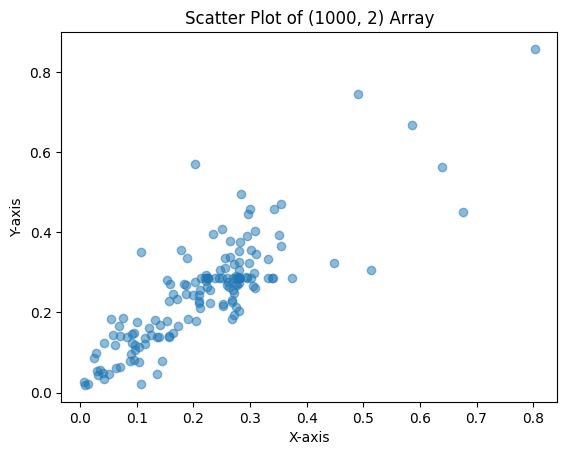

0.5992211391193689


In [5]:
from sklearn.metrics import r2_score

x = stability_matrix[:, 3]
y = stability_matrix[:, 15]

# Step 3: Create a scatter plot
plt.scatter(x, y, alpha=0.5)  # alpha=0.5 makes the points slightly transparent
plt.title('Scatter Plot of (1000, 2) Array')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
print(r2_score(x, y))

In [6]:
###5. averaging all model predictions

####CALCULATE ENSEMBLE AVERAGE PREDICTION VALUES

model_prediction_floats = np.array([np.mean(row) for row in stability_matrix])

model_prediction_std = np.array([np.std(row) for row in stability_matrix])

model_prediction_rmsd = np.mean(model_prediction_std)

print(model_prediction_rmsd)
print(model_prediction_std[:10])
print(stability_matrix[:10])

0.059598763
[0.10623664 0.14771402 0.03679841 0.05318544 0.04462941 0.04163214
 0.06563032 0.06893819 0.08351377 0.03878165]
[[0.6641709  0.7869327  0.7639843  0.80282575 0.89829916 0.72694916
  0.4464108  0.8336854  0.89636314 0.72945017 0.8273049  0.7847156
  0.7902856  0.8767836  0.74725777 0.8571762  0.78393006 0.6891459
  0.57153904 0.75113016]
 [0.43832132 0.6661268  0.63458747 0.49149033 0.7584262  0.49668878
  0.33942565 0.4273802  0.8289785  0.41707402 0.5570697  0.671591
  0.6814921  0.6411668  0.68429977 0.7440763  0.70636433 0.53692734
  0.24780728 0.6064845 ]
 [0.21852352 0.21200752 0.25777808 0.2801887  0.2451946  0.30656156
  0.19981627 0.24742495 0.2310168  0.26739967 0.25878346 0.24489225
  0.26206553 0.23575273 0.2616884  0.2871201  0.3766806  0.2617382
  0.26628637 0.23883377]
 [0.09648065 0.18006697 0.14663784 0.21007611 0.2481516  0.20096289
  0.12657258 0.15669888 0.1403964  0.16713108 0.13372666 0.12803695
  0.09428433 0.24289595 0.09746403 0.22782657 0.16595563 

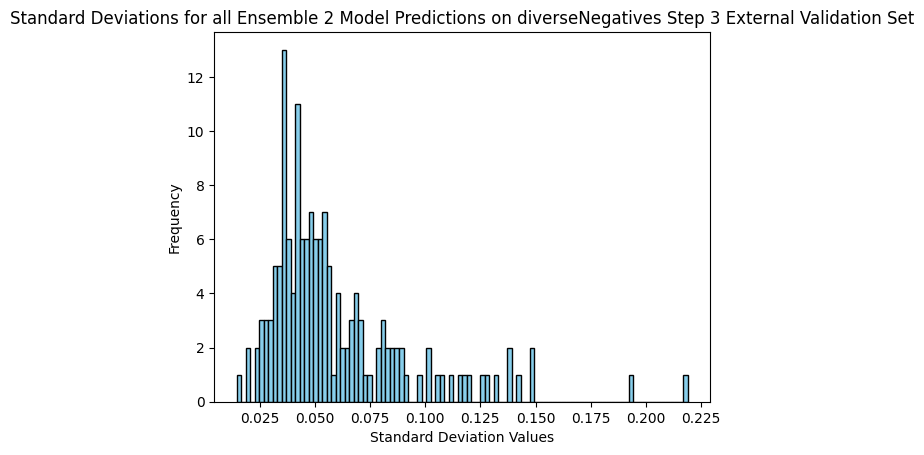

In [7]:
plt.hist(model_prediction_std, bins=100, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Standard Deviation Values')
plt.ylabel('Frequency')
plt.title('Standard Deviations for all Ensemble 2 Model Predictions on diverseNegatives Step 3 External Validation Set')
 

# Display the plot
plt.show()

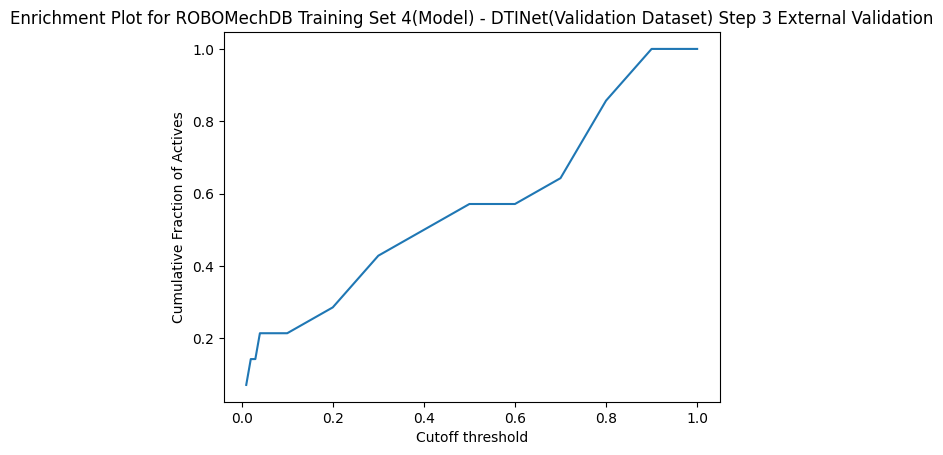

In [8]:
###6. Generate enrichment curve!

###README BELOW

#chi_cutoff_thresholds = the top % percent of model predictions evaluated
#N is equal to the total number of triples in the entire validation dataset, and Ns is equal to the total number of triples above the cutoff threshold. 
#ns is equal to the total number of true positives above the cutoff threshold, and n is equal to the total number of true positives across the whole dataset.

descending_confidence_values = np.sort(model_prediction_floats.flatten())[::-1]
ascending_indices = np.argsort(model_prediction_floats.flatten())
descending_indices = np.flip(ascending_indices)

chi_cutoff_thresholds = [0.01, 0.02, 0.03, 0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

enrichment_percent_array = []
y_values = []

N = len(model_prediction_floats)

n=0
for z in range(len(df_external)):
    if df_external.iloc[z,-1] == 1:
        n=n+1
        
for i in chi_cutoff_thresholds: 
    ns = 0
    Ns = len(model_prediction_floats)*i
    for j in range(int(i*len(model_prediction_floats))):
        if df_external.iloc[descending_indices[j],-1]==1:
            ns = ns+1
            
    y_value = ns/n
    y_values.append(y_value)

plt.xlabel("Cutoff threshold")
plt.ylabel("Cumulative Fraction of Actives")
plt.title("Enrichment Plot for ROBOMechDB Training Set 4(Model) - DTINet(Validation Dataset) Step 3 External Validation")

plt.plot(chi_cutoff_thresholds, y_values)

fpr,tpr, thresholds = roc_curve(df_external.iloc[:,-1],model_prediction_floats)

roc_auc = auc(fpr, tpr)

In [9]:
### 7. Generate statistics!

true_positive_count = 0
false_negative_count = 0
false_positive_count = 0
true_negative_count = 0



for i in range (0,len(model_prediction_floats)):
    if np.round(model_prediction_floats[i]) == 1 and np.round(df_external.iloc[i,-1]) == 1:
        true_positive_count += 1
    if np.round(model_prediction_floats[i]) == 0 and np.round(df_external.iloc[i,-1]) == 1:
        false_negative_count +=1
    if np.round(model_prediction_floats[i]) == 1 and np.round(df_external.iloc[i,-1]) == 0:
        false_positive_count +=1
    if np.round(model_prediction_floats[i]) == 0 and np.round(df_external.iloc[i,-1]) == 0:
        true_negative_count +=1

true_pos_rate = true_positive_count/(true_positive_count+false_negative_count)
true_neg_rate = true_negative_count/(false_positive_count+true_negative_count)
ppv = true_positive_count/(true_positive_count+false_positive_count)
npv = true_negative_count/(true_negative_count+false_negative_count)

performance_array = np.array(y_values+[roc_auc,true_pos_rate,true_neg_rate,model_prediction_rmsd,ppv,npv]).reshape(1,25)
print(performance_array.shape)
column_names = ['0.01', '0.02', '0.03','0.04','0.05','0.06','0.07','0.08','0.09','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0','auroc','tpr','tnr','pred_rmsd','ppv','npv']
stat_df = pd.DataFrame(performance_array, columns=column_names)


stat_df.to_csv(os.path.join(os.getcwd(), 'Validation Statistics/Model Performance on randomNegatives No Overlap External Set/set2_predicting_diverseNegs.csv'),index=False)

(1, 25)


In [11]:
stat_df.to_csv(os.path.join(os.getcwd(), 'Validation Statistics/Model Performance on randomNegatives No Overlap External Set/set2_predicting_diverseNegs.csv'),index=False)


In [10]:
print(stat_df)

       0.01      0.02      0.03      0.04      0.05      0.06      0.07  \
0  0.071429  0.142857  0.142857  0.214286  0.214286  0.214286  0.214286   

       0.08      0.09       0.1  ...       0.7       0.8  0.9  1.0     auroc  \
0  0.214286  0.214286  0.214286  ...  0.642857  0.857143  1.0  1.0  0.580547   

        tpr       tnr  pred_rmsd  ppv   npv  
0  0.142857  0.978723   0.059599  0.4  0.92  

[1 rows x 25 columns]
